# Computer vision - Laboratory

In [8]:
import numpy as np # useful for manipulating matrices
from skimage import * # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from scipy.ndimage import convolve
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import resize
from skimage.io.collection import ImageCollection
import matplotlib.animation as animation
%matplotlib inline

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing
2. Edge detection

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 Image processing with different scales and filters

a) Read the image "face.png" and analyse its histogram. What is the histogram representing for an image?

- Visualize the R, G, and B channels of the image.

- Visualize the histogram of a color image with the following characteristics:

    - Obtain the histogram with 8, 32, 64 and 256 bins. 

    - Visualize the histogram of each channel and the gray level image and compare them. Comment their difference (see image bellow as an example of histogram extraction).

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

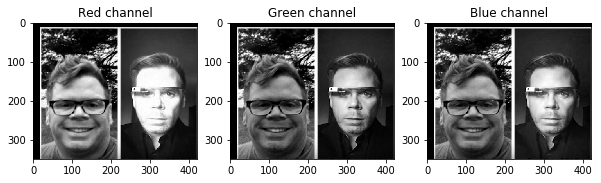

In [5]:
face = io.imread("images/face.png")

face_R, face_G, face_B = face[:, :, 0], face[:, :, 1], face[:, :, 2]

fig, axs = plt.subplots(1,3)
fig.set_size_inches(10,10)
axs[0].imshow(face_R, cmap='gray')
axs[0].set_title("Red channel")
axs[1].imshow(face_G, cmap='gray')
axs[1].set_title("Green channel")
axs[2].imshow(face_B, cmap='gray')
axs[2].set_title("Blue channel")
plt.show()

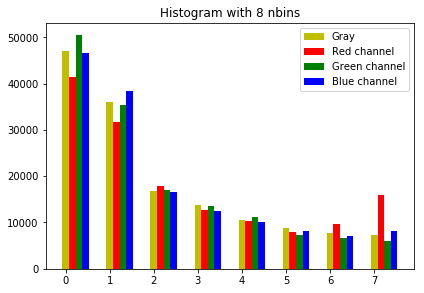

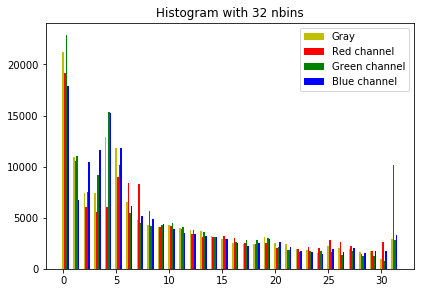

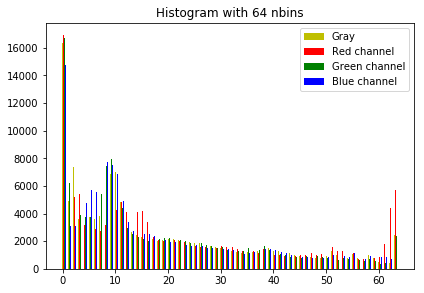

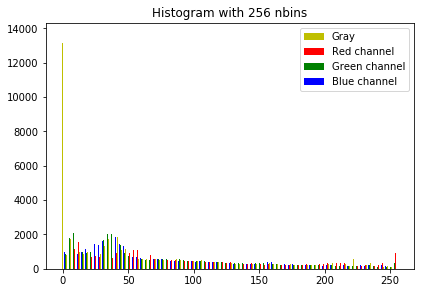

In [9]:
def plot_RGBgray_histogram(img, nbins, width = 0.15, overlap=True):
    
    # Overlap parameter (bool) plots RGB-gray histogram values on the same plot when True. If false it prints them in separate
    # plots.
    
    # The 'histogram' function from the exposure libray returns the values from the histogram as well as the values at the 
    # center of the bins. Only the first ones are being used here.
    hist_gray, _ = exposure.histogram(img_as_float(rgb2gray(np.copy(img))), nbins)
    hist_R, _ = exposure.histogram(img_as_float(img[:, :, 0]), nbins)
    hist_G, _ = exposure.histogram(img_as_float(img[:, :, 1]), nbins)
    hist_B, _ = exposure.histogram(img_as_float(img[:, :, 2]), nbins)
    
    index = np.arange(nbins)
    
    if overlap:
        # All the histograms of RGB channels and gray on the same plot.
        rects_gray = plt.bar(index, hist_gray, width, color='y',label='Gray')
        rects_R = plt.bar(index + width, hist_R, width, color='r',label='Red channel')
        rects_G = plt.bar(index + 2*width, hist_G, width, color='g',label='Green channel')
        rects_B = plt.bar(index + 3*width, hist_B, width, color='b',label='Blue channel')

        plt.legend()
        plt.tight_layout()
        plt.title("Histogram with " + str(nbins) + " nbins")
    else:
        # Histograms in different subplots.
        fig, axs = plt.subplots(1,4)
        fig.set_size_inches(20,5)
        axs[0].bar(index, hist_gray, color='gray')
        axs[0].set_title('Gray level image')  
        axs[1].bar(index, hist_R, color='red')
        axs[1].set_title('Red channel') 
        axs[2].bar(index, hist_G, color='green')
        axs[2].set_title('Green channel') 
        axs[3].bar(index, hist_B, color='blue')
        axs[3].set_title('Blue channel') 
    
    plt.show()

face = io.imread("images/face.png")
plot_RGBgray_histogram(face, 8)
plot_RGBgray_histogram(face, 32)
plot_RGBgray_histogram(face, 64)
plot_RGBgray_histogram(face, 256)

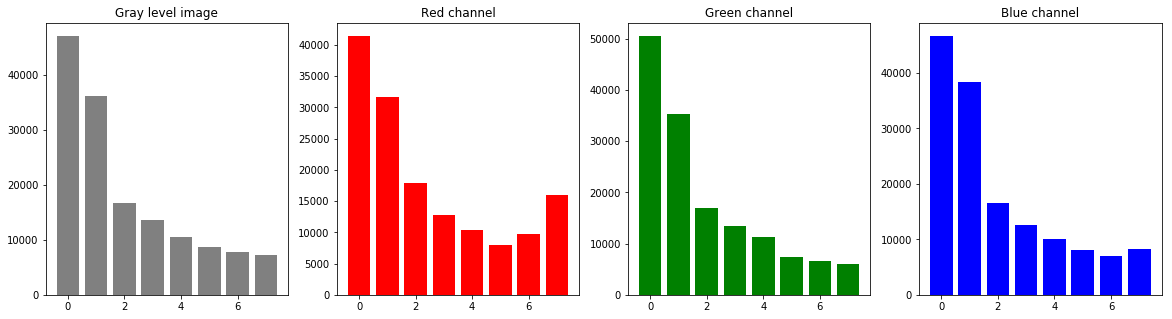

In [10]:
face = io.imread("images/face.png")
plot_RGBgray_histogram(face, 8, overlap=False)

**Comment:** From the histograms of the different channels, we can clearly see that the green tones are less present in the image in comparison to the red or blue channels.

b) Read the image `face.png` (a) and convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]`(b). Later, substract the obtained image to the original one and save the new image (c). 

***To make your code legible, the resulted images should be shown in a 3x1 plot, with the following titles: a) 'Original image', b) 'Convolved image' and c) 'Difference with the original image'***

Hint: the `convolve` command belongs to the library `ndimage` of `scipy`. 

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Plot the different images ((a)original image, (b)intermediate and (c)final) on a figure with multiple images. Put titles on the image plots to explain what each image represents. Is the type of the mask important for the convolution? How is the image changed after the convolution? You need to repeat several times the convolution. Moreover, you need to also use bigger masks in order to observe better the effect of it. Present at least 5 experiments commenting the results obtained and their differences.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

float64


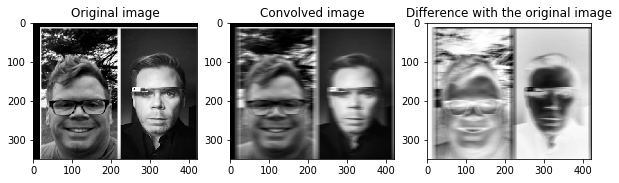

Oginal image range [min, max]:  0.0 1.0 float64
Convolved image range [min, max]:  0.0 14.935489411764708 float64


H:\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [13]:
face = rgb2gray(io.imread("images/face.png"))
mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

def convolve_image_mask(img, mask):

    convolved = convolve(np.copy(img), mask)
    difference = np.copy(img) - convolved
    print(difference.dtype)

    fig, axs = plt.subplots(1,3)
    fig.set_size_inches(10,10)
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title("Original image")
    axs[1].imshow(convolved, cmap='gray')
    axs[1].set_title("Convolved image")
    axs[2].imshow(difference, cmap='gray')
    axs[2].set_title("Difference with the original image")
    plt.show()

    return convolved, difference

c1, difference = convolve_image_mask(face, mask_h1d)
print("Oginal image range [min, max]: ", face.min(), face.max(), face.max().dtype)
print("Convolved image range [min, max]: ", c1.min(), c1.max(), c1.max().dtype)

io.imsave("diff.png", np.interp(difference, (difference.min(), difference.max()), (-1, +1)))

Experiment #1:
float64


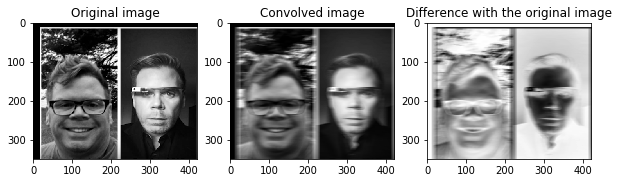

Experiment #2:
float64


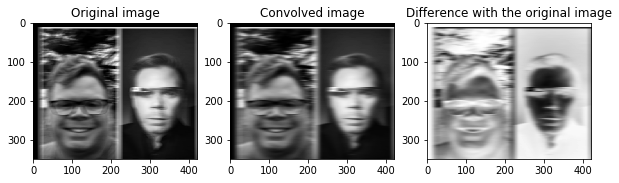

Experiment #3:
float64


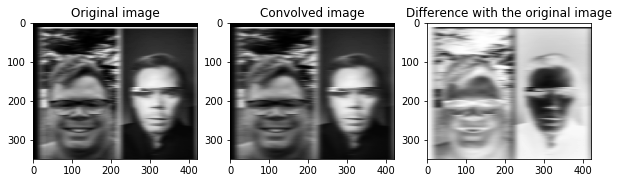

Experiment #4:
float64


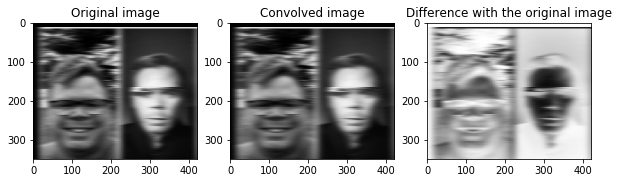

Experiment #5:
float64


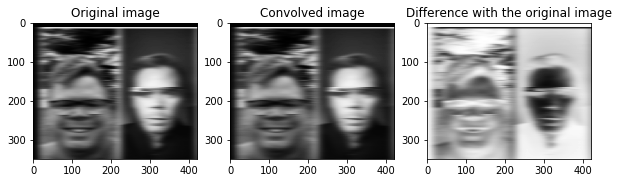

In [14]:
face = rgb2gray(io.imread("images/face.png"))
mask_h1d = np.asarray([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

convolved = np.copy(face)

for i in range(1, 6):
    print("Experiment #"+ str(i) + ":")
    convolved, difference = convolve_image_mask(convolved, mask_h1d*5)

**Comment:** The type of the mask is very important since its shape determines the orientation of how the mask will be applied to the different pixels. The range of the values changes depending on the type and values of the shape, those factors determine how the mask will affect the surrounding pixels of the image.

c) Convolve the image with a vertical one-dimensional mask. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

Horitzontal mask:
float64


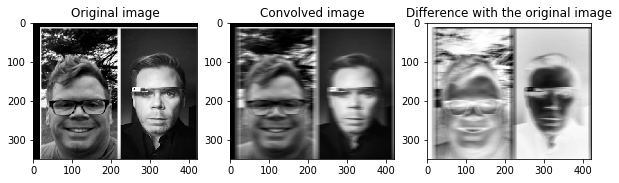

Vertical mask:
float64


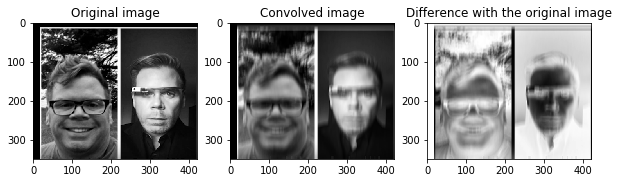

In [15]:
face = rgb2gray(io.imread("images/face.png"))
mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

print("Horitzontal mask:")
h1, hd1 = convolve_image_mask(face, mask_h1d)
print("Vertical mask:")
v1, vd1 = convolve_image_mask(face, np.transpose(mask_h1d))

d) Convolve the original image with a uniform `two-dimensional` mask of dimensions 15x15 and with all values set to 1. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

float64


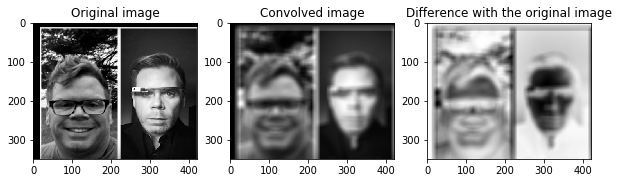

In [17]:
face = rgb2gray(io.imread("images/face.png"))
mask_h2d = np.ones((15,15))

_, _ = convolve_image_mask(face, mask_h2d)

**Comparison:** When a two dimensional mask is applied, the image convolves on both axis, whereas with one dimension mask, the convulsion is only visible on the orientation of the mask.

e) Can we convolve a color image? 

Implement a 3-channel filter, apply it, visualize the 3 images (a, b and c) and comment the results obtained.

Which is the result obtained when applying a single-channel filter channel by channel separately? Visualize again the three images (original, convolved and difference) and compare the results.

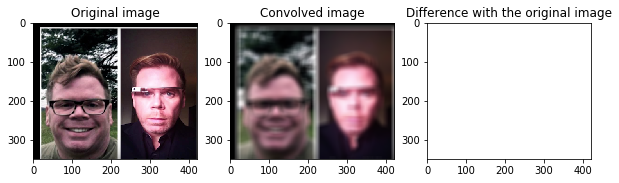

In [20]:
# The convulsion cannot be applied to a 3-channel image directly. In order to successfully apply the mask on a RGB image,
# the mask needs to be applied on each channel separately.
def convolve_RGB_2DMask(image, all=False):
    
    convolved = np.copy(image)
    mask_h2d =  [[1/15**2]*15]*15 #np.ones((15,15))

    imageR, imageG, imageB = np.copy(image[:, :, 0]), np.copy(image[:, :, 1]), np.copy(image[:, :, 2])
    
    # Applying the convulsion channel by channel.
    convolved[:, :, 0] = convolve(np.copy(imageR), mask_h2d)
    convolved[:, :, 1] = convolve(np.copy(imageG), mask_h2d)
    convolved[:, :, 2] = convolve(np.copy(imageB), mask_h2d)

    difference = np.copy(image) - convolved
    
    if all:
        # Prints the 3 different images requested on some exercises (original, convolved and difference).
        fig, axs = plt.subplots(1,3)
        fig.set_size_inches(10,10)
        axs[0].imshow(image)
        axs[0].set_title("Original image")
        axs[1].imshow(convolved)
        axs[1].set_title("Convolved image")
        axs[2].imshow(difference)
        axs[2].set_title("Difference with the original image")
        plt.show()
    else:
        # Only plots the convolved image.
        plt.imshow(convolved)
    
    return convolved, difference
    

face = io.imread("images/face.png")
_, _ = convolve_RGB_2DMask(face, all=True)

Given a color image (im), what is the difference between ***a*** and ***b*** ?
   
*** a) ***

im_2=np.array(im, dtype='float')


*** b) ***

im_2=np.array(im)


im_2=img_as_float(im_2)

**Answer:** Using method (a) the image will have values from 0 to 255, whereas with method (b) the range of the values of the image will be from 0 to 1.

f) Change the size of the image a) reducing it 10 times ***and*** b) augmenting it two times. 

Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why. 

Apply the convolution on the three images with the same two dimensional uniform mask and comment the results.
Note: Observe what is the output of the command `resize`.


Reduced:


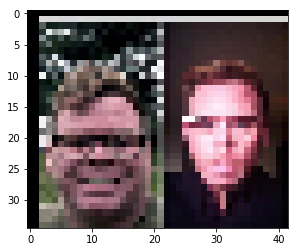

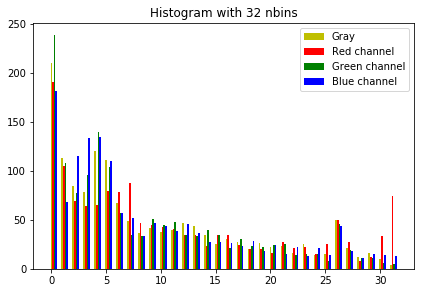

Augmented:


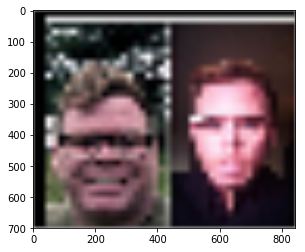

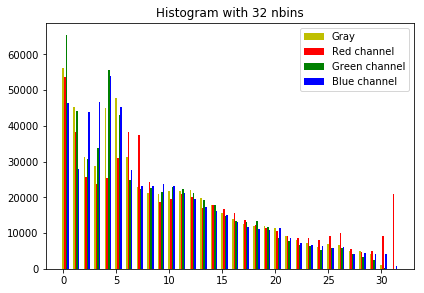

In [24]:
face = io.imread("images/face.png")
f, c, _ = face.shape

# The resize function requires a new shape for the resized image, so when reducing an image 'x' times it's shape it's divided
# 'x' times, and when augmenting the other way around.

print("Reduced:")
# Dividing the shape may lead to error since the new shape may be a float value instead of an integer. In order to avoid that,
# the new shaped is casted to an Integer.
reduced = resize(face, (int(f/10), int(c/10)))
plt.imshow(reduced)
plt.show()
plot_RGBgray_histogram(reduced, 32)

print("Augmented:")
# Multiplying an int should not generate float values, so here we don't apply the cast conversion.
augmented = resize(np.copy(reduced), (f*2, c*2))
plt.imshow(augmented)
plt.show()
plot_RGBgray_histogram(augmented, 32)

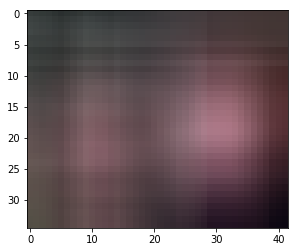

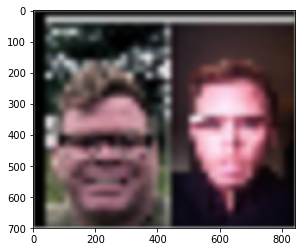

In [25]:
_, _ = convolve_RGB_2DMask(reduced)
plt.show()
_, _ = convolve_RGB_2DMask(augmented)

**Comment:** Since resize works pixel by pixel, augmenting or reducing them, we can say that the histograms stay pretty much the same as before being resized, thereupon the pixel values are multiplied.

#### 2.2 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the original image of the previous exercise:

- Gaussian kernel with sigma = 1
- Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
- Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: use the skimage.filters function for creating the different filters.

**(Optional)** Apply the smoothing on some other images and present their results.

### 2.3 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session (roberts, prewitt, sobel and canny). Also, find the optimal parameteres for each of them.

Use subplot and title to visualize the results.

Which is the best countour detection technique? 

Which are the optimal parameters for this image? 

Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

Hint: use skimage.feature.canny for applying the canny filter

Optional: Superimpose the contours over the image.

b)	Repeate the experiment with other images, you can use the ones included in the folder **images**. Comment if the parameters need to be changed for the different images.

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

d) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.4 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images, compute the hybrid image and visualize it.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

b) Combine both hybrid images and visualize them. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. Additionally, rescale the image to different size and comment the results. Present the different visualizations of the experiment performed.

Optional : compute hybrid images from other images. Apply it over color images.

## 2.5 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg



In [3]:
# Loading all the frames from the Big Bang episode.
images = io.ImageCollection("./images/bigbangcollection/*.png")

<IPython.core.display.Javascript object>


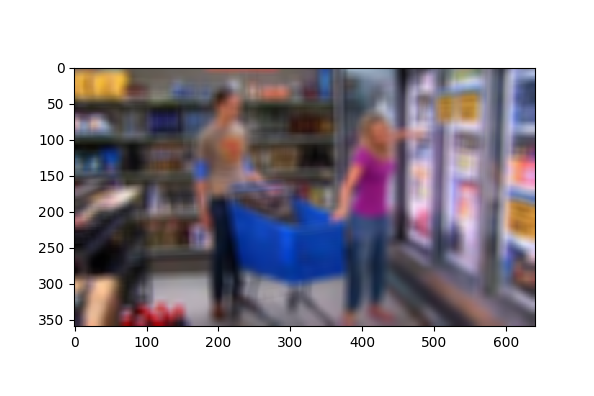

In [5]:
# Using nbagg plugin to play the animation.
%matplotlib nbagg 

def convolve_RGB(image, mask=[[1/15**2]*15]*15):
    
    # Applies a 2D mask to a given image, the it's returned.
    
    i_conv = np.copy(image)
    
    imageR, imageG, imageB = np.copy(image[:, :, 0]), np.copy(image[:, :, 1]), np.copy(image[:, :, 2])

    i_conv[:, :, 0] = convolve(np.copy(imageR), mask)
    i_conv[:, :, 1] = convolve(np.copy(imageG), mask)
    i_conv[:, :, 2] = convolve(np.copy(imageB), mask)
    
    return i_conv

def update(i):
    
    # Updates the frame.
    im.set_array(convolve_RGB(images[i]))
    plt.draw()
    return im

fig = plt.figure()
im = plt.imshow(images[0]) # First frame is shown.
a = animation.FuncAnimation(fig, update, frames=len(images), blit=True) # Blit parameter optimizes drawing (acording to doc).
plt.show()

## Delivery

Compressed file **P2_Student1_Student2.zip** that includes:
- The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P2.zip.

**Deadline (Campus Virtual): October 15, 11:00 p.m.** 
